<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/master/notebooks/examples-stellar-rotation-gls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install git+https://github.com/jpdeleon/chronos.git@master

In [2]:
%matplotlib inline
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [3]:
s = cr.ShortCadence(toiid=837)

Target: TOI 837
Available sectors: [10 11]
Using sector=10.
Searching lightcurvefile for TIC 460205581 (sector 10)
Found 1 lightcurves
Using TESS short cadence.



## stellar rotation

Using period=8.3249 d, epoch=1574.27 BTJD, duration=1.86 hr
Using biweight filter with window_length=0.23 day


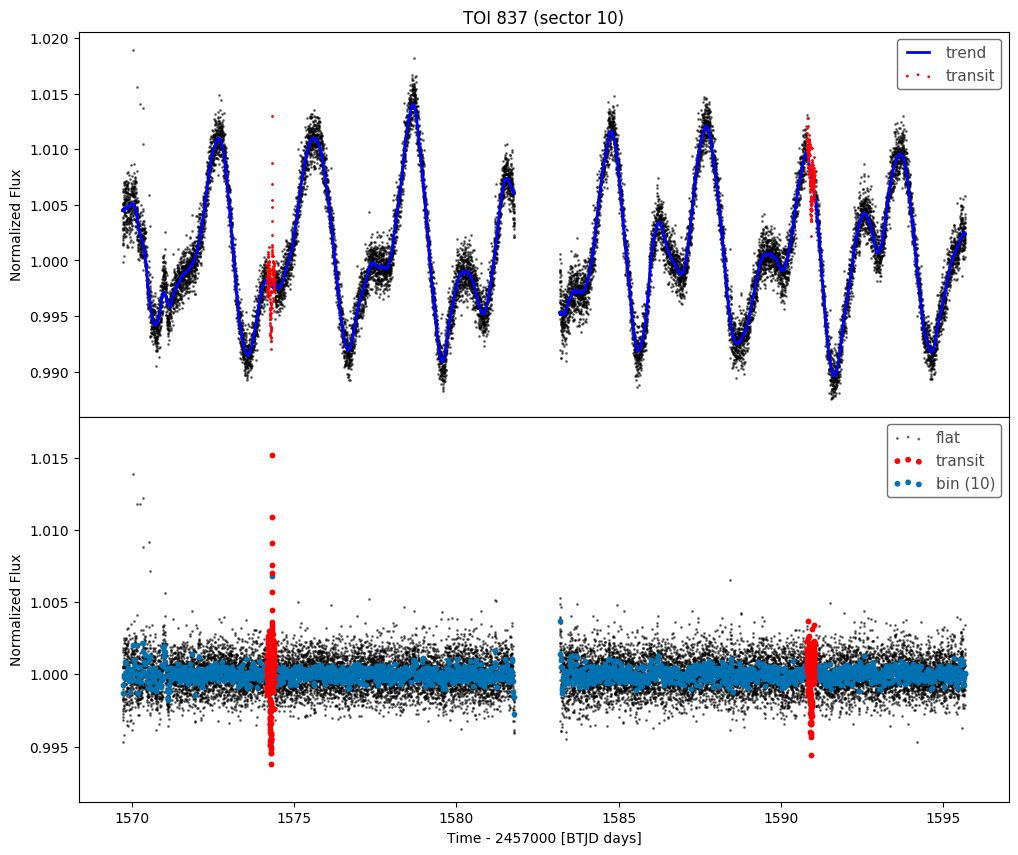

In [4]:
lc=s.get_lc()

fig = s.plot_trend_flat_lcs(lc)

## Using vanilla Lomb-Scargle

In [5]:
transit_mask = cr.get_transit_mask(lc,
                                   period=s.toi_period,
                                   epoch=s.toi_epoch,
                                   duration_hours=s.toi_duration
                                  )

Using Lomb-Scargle method
P=2.99+/-0.12 d


Text(0.5, 0.98, 'TOI 837 (sector 10)')

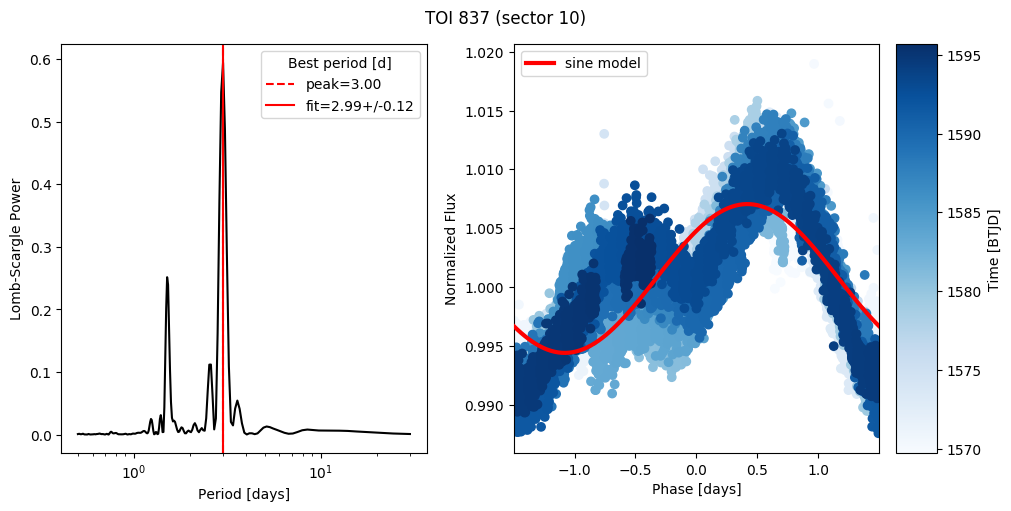

In [6]:
fig = cr.plot_rotation_period(lc[~transit_mask].time, lc[~transit_mask].flux
                          )
fig.suptitle(f"TOI {s.toiid} (sector {s.sector})")

## Using Generalized Lomb-Scargle

In [7]:
data = [lc.time, lc.flux, lc.flux_err]
gls = cr.Gls(data)

In [8]:
gls.best

{'f': 0.3349529717789705,
 'P': 2.985493738684851,
 'amp': 0.006384045702914982,
 'ph': 0.3046549950976638,
 'T0': 1568.799596707398,
 'offset': 1.000814907952349,
 'e_amp': 4.0074471532763833e-05,
 'e_ph': 0.00099906086720566,
 'e_T0': 0.002982689963607555,
 'e_offset': 2.833693057328457e-05,
 'e_f': 0.00018368439047827673,
 'e_P': 0.001637210724701109}

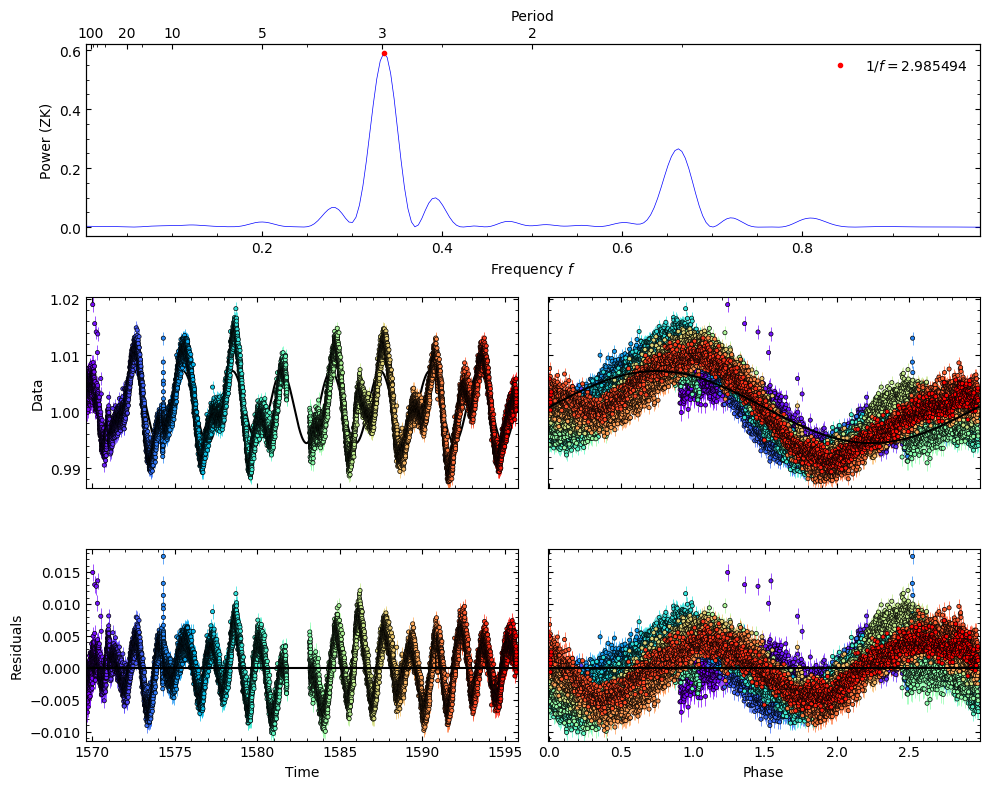

In [9]:
fig = gls.plot()

## See also
* examples-age.ipynb